In [1]:
# Importing Dataset
dir =  '../../Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 14 - Logistic Regression/R/Social_Network_Ads.csv'
dataset = read.csv(dir)

In [2]:
dataset

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0
15598044,Female,27,84000,0
15694829,Female,32,150000,1
15600575,Male,25,33000,0
15727311,Female,35,65000,0


In [3]:
dataset = dataset[3:5]

In [4]:
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))


In [5]:
library('caTools')
set.seed(123)

In [6]:
split = sample.split(dataset$Purchased, SplitRatio=0.75 )
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split==FALSE)

In [7]:
#Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [8]:
nrow(dataset)
nrow(training_set)
nrow(test_set)

[1] 400

[1] 300

[1] 100

In [9]:
test_set

,Age,EstimatedSalary,Purchased
2,-0.30419063,-1.5135434,0
4,-1.05994374,-0.3245603,0
5,-1.81569686,0.2859986,0
9,-1.24888202,-1.0957926,0
12,-1.15441288,-0.4852337,0
18,0.64050076,-1.3207353,1
19,0.73496990,-1.2564660,1
20,0.92390818,-1.2243313,1
22,0.82943904,-0.5816377,1
29,-0.87100546,-0.7744458,0


In [10]:
#install.packages('kernlab')
library(kernlab)

In [11]:
kpca = kpca(~., data = training_set[-3], kernel = 'rbfdot', features =2)

In [12]:
training_set_pca = as.data.frame(predict(kpca, training_set))

In [13]:
training_set_pca$Purchased = training_set$Purchased

In [14]:
test_set_pca = as.data.frame(predict(kpca, test_set))
test_set_pca$Purchased = test_set$Purchased

In [15]:
classifier = glm(formula = Purchased ~ .,
                 family = binomial,
                 data = training_set_pca)

In [16]:
prob_pred = predict(classifier, type = 'response', newdata=test_set_pca[-3])

In [17]:
y_pred = ifelse(prob_pred > 0.5, 1, 0)

In [18]:
table(test_set$Purchased)


 0  1 
64 36 

In [19]:
table(y_pred)

y_pred
 0  1 
67 33 

In [20]:
mean(y_pred == test_set$Purchased)

[1] 0.83

In [21]:
summary(classifier)


Call:
glm(formula = Purchased ~ ., family = binomial, data = training_set_pca)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8679  -0.4607  -0.1230   0.3191   2.4451  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.27556    0.21592  -5.907 3.47e-09 ***
V1           0.47918    0.05873   8.159 3.39e-16 ***
V2           0.14365    0.03280   4.380 1.19e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 191.09  on 297  degrees of freedom
AIC: 197.09

Number of Fisher Scoring iterations: 6


In [22]:
cm = table(test_set[,3], y_pred)

In [23]:
cm


   y_pred
     0  1
  0 57  7
  1 10 26

In [24]:
mean(y_pred == test_set$Purchased)

[1] 0.83

In [25]:
library(ElemStatLearn)


Warning message:
“package ‘ElemStatLearn’ was built under R version 4.0.0”

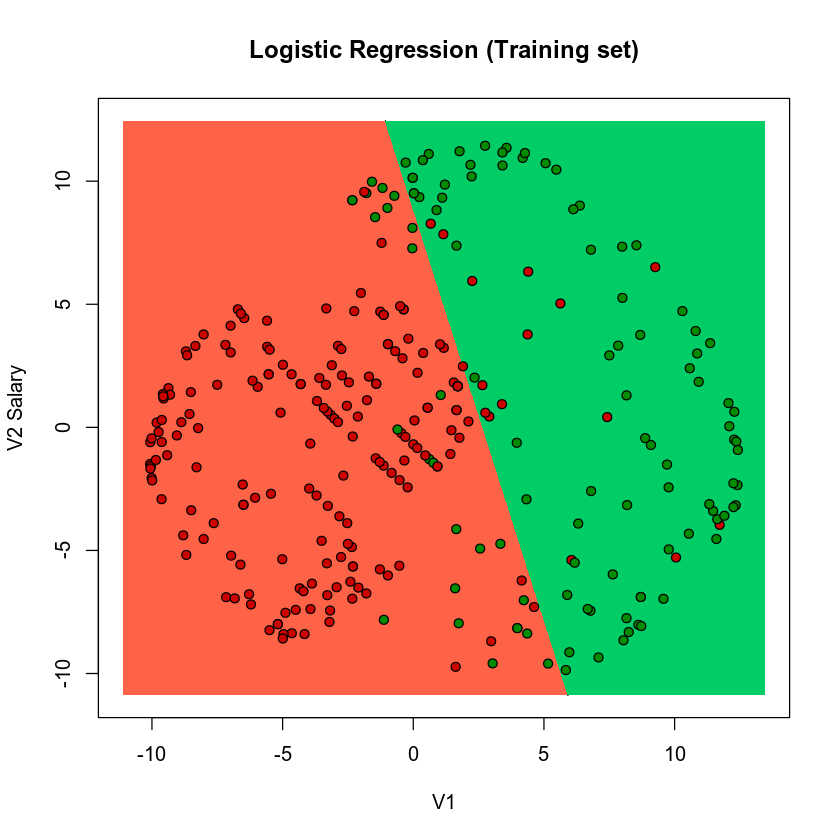

In [26]:
set = training_set_pca


X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)

colnames(grid_set) = c('V1', 'V2')

prob_set = predict(classifier, type = 'response', newdata = grid_set)

y_grid = ifelse(prob_set > 0.5, 1, 0)

plot(set[,-3],
     main = 'Logistic Regression (Training set)',
     xlab = 'V1', ylab = 'V2 Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

In [27]:
\

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: \
    ^
